<a href="https://colab.research.google.com/github/HarishChinnakadiri/Harish_INFO5731_Spring2024/blob/main/Chinnakadiri_Harish_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [5]:
# Write your code here
import requests, csv
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint

url = "https://www.imdb.com/title/tt13927994/reviews/?ref_=ttrt_ql_2"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

imdb_reviews=[]
right_table=soup.find('div', {'class':"lister"})
for i in right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
  imdb_reviews.append(i.find("div", class_="text show-more__control").text.strip())
pprint(imdb_reviews)


['Salaar Part 1 has an unbearable first half, with useless exposition, a '
 'needless Shruti Hassan (thankfully not a romantic interest for Prabhas), an '
 'overbearing and supremely annoying mom-son angle, ultrabasic mass hero '
 'build-ups, and a tame set-piece (Anbariv Masters, what the hell is happening '
 "here?). Some kids even refer to Prabhas as a cut-out, and that's exactly "
 'what he is for the entirety of the initial half. Though he looks good, the '
 'man is stiffer than tree bark, and Eashwari Rao (playing his mother) is '
 "supposedly emoting for the both of them, as she's asked to ham it up. I "
 "haven't seen Ugramm and I don't intend to see it either, especially if it's "
 "anything like this.It's only in the second half that the film starts its "
 "world-building exercise, and since there's only 90 minutes to do so, "
 'writer-director Prashant Neel is forced to explain key plot points over '
 'voiceovers. Dozens of new characters are introduced, a whole lawbook is '

In [6]:
df = pd.DataFrame({'reviews': imdb_reviews})

df.to_csv('reviews.csv')
df.head()

,reviews
0,"Salaar Part 1 has an unbearable first half, wi..."
1,Action movies have become excessively exaggera...
2,The movie is a disappointing example of Telugu...
3,***Salaar Movie Review ***Directed by Prashant...
4,Salaar has been my most-awaited film for 2023....


In [4]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import nltk
nltk.download('stopwords')
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [7]:
!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

rev_data = df['reviews'].values.tolist()
rev_data_words = list(sent_to_words(rev_data))
rev_data_words = remove_stopwords(rev_data_words)
print(rev_data_words[:1])

[['salaar', 'part', 'unbearable', 'first', 'half', 'useless', 'exposition', 'needless', 'shruti', 'hassan', 'thankfully', 'romantic', 'interest', 'prabhas', 'overbearing', 'supremely', 'annoying', 'mom', 'son', 'angle', 'ultrabasic', 'mass', 'hero', 'build', 'ups', 'tame', 'set', 'piece', 'anbariv', 'masters', 'hell', 'happening', 'kids', 'even', 'refer', 'prabhas', 'cut', 'exactly', 'entirety', 'initial', 'half', 'though', 'looks', 'good', 'man', 'stiffer', 'tree', 'bark', 'eashwari', 'rao', 'playing', 'mother', 'supposedly', 'emoting', 'asked', 'ham', 'seen', 'ugramm', 'intend', 'see', 'either', 'especially', 'anything', 'like', 'second', 'half', 'film', 'starts', 'world', 'building', 'exercise', 'since', 'minutes', 'writer', 'director', 'prashant', 'neel', 'forced', 'explain', 'key', 'plot', 'points', 'voiceovers', 'dozens', 'new', 'characters', 'introduced', 'whole', 'lawbook', 'explained', 'shots', 'lines', 'power', 'tussle', 'set', 'motion', 'also', 'prithviraj', 'sukumaran', 'en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(rev_data_words)

data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['salaar', 'part', 'unbearable', 'first', 'half', 'useless', 'exposition', 'thankfully', 'romantic', 'interest', 'prabha', 'overbear', 'supremely', 'annoying', 'mom', 'son', 'angle', 'ultrabasic', 'mass', 'hero', 'build', 'up', 'set', 'piece', 'anbariv', 'master', 'hell', 'happen', 'kid', 'even', 'refer', 'prabha', 'cut', 'exactly', 'entirety', 'initial', 'half', 'though', 'look', 'good', 'man', 'stiffer', 'bark', 'rao', 'play', 'mother', 'supposedly', 'emote', 'ask', 'see', 'intend', 'see', 'especially', 'second', 'half', 'film', 'start', 'world', 'building', 'exercise', 'minute', 'writer', 'director', 'prashant', 'neel', 'force', 'explain', 'key', 'plot', 'point', 'voiceover', 'dozen', 'new', 'character', 'introduce', 'whole', 'lawbook', 'explain', 'shot', 'line', 'power', 'tussle', 'set', 'motion', 'also', 'prithviraj', 'large', 'chunk', 'film', 'essential', 'bit', 'dialogue', 'reserve', 'final', 'act', 'cliffhanger', 'ish', 'finale', 'duo', 'redeem', 'part', 'extent', 'barely', 'f

In [11]:
review_id2word = corpora.Dictionary(data_lemmatized)
review_texts = data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts]
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 4), (50, 4), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

[[('act', 1),
  ('action', 1),
  ('also', 3),
  ('anbariv', 1),
  ('angle', 1),
  ('annoying', 1),
  ('appreciate', 1),
  ('ask', 1),
  ('barely', 1),
  ('bark', 1),
  ('basrur', 1),
  ('bit', 1),
  ('block', 1),
  ('boringly', 1),
  ('build', 1),
  ('building', 1),
  ('character', 1),
  ('choice', 1),
  ('chunk', 1),
  ('cinephile', 1),
  ('cliffhanger', 1),
  ('color', 1),
  ('cut', 1),
  ('decent', 1),
  ('deity', 1),
  ('deliver', 1),
  ('dialogue', 1),
  ('direction', 1),
  ('director', 1),
  ('disposable', 1),
  ('dozen', 1),
  ('dub', 1),
  ('duo', 1),
  ('edit', 1),
  ('effort', 1),
  ('emote', 1),
  ('emotional', 1),
  ('entirety', 1),
  ('especially', 1),
  ('essential', 1),
  ('even', 1),
  ('exactly', 1),
  ('exercise', 1),
  ('explain', 2),
  ('exposition', 1),
  ('extension', 1),
  ('extent', 1),
  ('fall', 1),
  ('fantastic', 1),
  ('feel', 4),
  ('film', 4),
  ('final', 1),
  ('finale', 1),
  ('first', 1),
  ('fly', 1),
  ('force', 1),
  ('franchise', 1),
  ('friendship

In [12]:
review_id2word[0]

'act'

In [13]:
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[review_corpus]

[(0,
  '0.055*"movie" + 0.045*"film" + 0.022*"waste" + 0.019*"speak" + '
  '0.019*"actor" + 0.015*"part" + 0.015*"main" + 0.015*"whole" + '
  '0.012*"salaar" + 0.012*"dialogue"'),
 (1,
  '0.045*"movie" + 0.027*"audience" + 0.018*"half" + 0.018*"lack" + '
  '0.009*"character" + 0.009*"part" + 0.009*"role" + 0.009*"feel" + '
  '0.009*"story" + 0.009*"coherence"'),
 (2,
  '0.001*"film" + 0.001*"seem" + 0.001*"movie" + 0.001*"action" + '
  '0.001*"spectacle" + 0.001*"audience" + 0.001*"neel" + 0.001*"move" + '
  '0.001*"disappointment" + 0.001*"repetitive"'),
 (3,
  '0.021*"film" + 0.021*"neel" + 0.017*"salaar" + 0.017*"spectacle" + '
  '0.017*"emotional" + 0.013*"audience" + 0.013*"thematic" + '
  '0.013*"performance" + 0.013*"fleeting" + 0.013*"depth"'),
 (4,
  '0.032*"movie" + 0.016*"neel" + 0.015*"salaar" + 0.015*"action" + '
  '0.014*"part" + 0.014*"make" + 0.011*"scene" + 0.010*"mass" + '
  '0.010*"character" + 0.010*"lot"'),
 (5,
  '0.018*"movie" + 0.018*"half" + 0.018*"long" + 0.01

In [13]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3528247139952658


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
start, limit, step=2, 20, 2
model_list, coherence_values = compute_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
cohe_val = []
for m, cv in zip(range(start, limit, step), coherence_values):
    cohe_val.append(round(cv,4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2681
Num Topics = 4  has Coherence Value of 0.2607
Num Topics = 6  has Coherence Value of 0.3338
Num Topics = 8  has Coherence Value of 0.33
Num Topics = 10  has Coherence Value of 0.3169
Num Topics = 12  has Coherence Value of 0.3038
Num Topics = 14  has Coherence Value of 0.3166
Num Topics = 16  has Coherence Value of 0.3077
Num Topics = 18  has Coherence Value of 0.3146


In [15]:
sum(cohe_val)/len(cohe_val)

0.3058

In [16]:
optimal_model = model_list[3] # getting the topics=8 model, which is in 3rd index of our model and getting the 8 topics.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.028*"film" + 0.021*"salaar" + 0.018*"movie" + 0.017*"part" + 0.011*"neel" '
  '+ 0.008*"action" + 0.008*"story" + 0.008*"big" + 0.007*"half" + '
  '0.007*"time"'),
 (1,
  '0.001*"movie" + 0.001*"neel" + 0.001*"salaar" + 0.001*"character" + '
  '0.001*"make" + 0.001*"half" + 0.001*"part" + 0.001*"action" + 0.001*"end" + '
  '0.001*"scene"'),
 (2,
  '0.001*"film" + 0.001*"part" + 0.001*"neel" + 0.001*"salaar" + 0.001*"movie" '
  '+ 0.001*"action" + 0.001*"half" + 0.001*"feel" + 0.001*"audience" + '
  '0.001*"set"'),
 (3,
  '0.016*"audience" + 0.013*"movie" + 0.013*"neel" + 0.013*"film" + '
  '0.011*"salaar" + 0.011*"lack" + 0.011*"emotional" + 0.011*"spectacle" + '
  '0.008*"support" + 0.008*"performance"'),
 (4,
  '0.038*"movie" + 0.017*"make" + 0.013*"neel" + 0.013*"action" + 0.012*"part" '
  '+ 0.010*"salaar" + 0.009*"watch" + 0.009*"character" + 0.009*"time" + '
  '0.009*"scene"'),
 (5,
  '0.025*"action" + 0.023*"movie" + 0.012*"salaar" + 0.009*"half" + '
  '0.009*"feel" + 

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [15]:
# Write your code here
from gensim.models import LsiModel

lsamodel = LsiModel(review_corpus, num_topics=10, id2word = review_id2word)
print(lsamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.382*"movie" + 0.288*"salaar" + 0.261*"neel" + 0.239*"part" + 0.207*"action" + 0.176*"film" + 0.176*"make" + 0.157*"scene" + 0.144*"half" + 0.125*"end"'), (1, '-0.410*"movie" + 0.273*"salaar" + 0.213*"film" + 0.174*"big" + 0.139*"go" + 0.133*"hour" + 0.111*"prashanth" + -0.110*"character" + 0.106*"give" + 0.106*"call"'), (2, '0.312*"film" + -0.237*"movie" + 0.205*"emotional" + 0.194*"spectacle" + 0.151*"potential" + 0.147*"neel" + 0.144*"fleeting" + 0.144*"thematic" + 0.141*"depth" + 0.132*"performance"'), (3, '0.502*"movie" + 0.184*"watch" + 0.151*"speak" + 0.149*"actor" + 0.137*"audience" + -0.136*"neel" + 0.134*"money" + -0.132*"scene" + 0.132*"time" + -0.120*"score"'), (4, '-0.269*"film" + -0.224*"see" + -0.221*"feel" + -0.193*"set" + -0.170*"also" + 0.153*"neel" + -0.146*"half" + -0.132*"part" + -0.119*"prabha" + -0.119*"explain"'), (5, '0.482*"action" + 0.236*"thriller" + 0.211*"salaar" + -0.197*"character" + -0.191*"film" + 0.177*"trailer" + -0.146*"movie" + -0.124*"make"

In [16]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)
        model_list.append(lsamodel)
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step=2, 20, 2
model_lsa, coherence_values = compute_lsa_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv,4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))

Topic no = 2  it's Coherence Value is 0.3752
Topic no = 4  it's Coherence Value is 0.31
Topic no = 6  it's Coherence Value is 0.4138
Topic no = 8  it's Coherence Value is 0.4145
Topic no = 10  it's Coherence Value is 0.3722
Topic no = 12  it's Coherence Value is 0.3636
Topic no = 14  it's Coherence Value is 0.3821
Topic no = 16  it's Coherence Value is 0.3419
Topic no = 18  it's Coherence Value is 0.3832


In [19]:
coherencemodel = CoherenceModel(model=lsamodel, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
print(coherencemodel.get_coherence())

0.3345845924639486


In [20]:
coherence_values_all

[0.3484, 0.3139, 0.4844, 0.427, 0.3829, 0.3439, 0.3171, 0.3099, 0.3675]

In [21]:
#sum(coherence_values_all)/len(coherence_values_all)

average_coherence = sum(coherence_values_all) / len(coherence_values_all)
print("Average Coherence Value:", average_coherence)

Average Coherence Value: 0.3661111111111111


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [17]:
# Write your code here
nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [18]:
top_valu = 10
top_topwords = {}
for j, topic_to_word in enumerate(df.reviews.tolist()):
    top = np.argsort(topic_to_word)[::-1][:top_valu]
    msg = 'Topic %i '  % j
    top_words = [df.reviews.tolist()[i].strip()[:35] for i in top]
    msg += 'has stop words '.join(top_words)
    print (msg)
    top_topwords[j] = top_words

Topic 0 Salaar Part 1 has an unbearable fir
Topic 1 Salaar Part 1 has an unbearable fir
Topic 2 Salaar Part 1 has an unbearable fir
Topic 3 Salaar Part 1 has an unbearable fir
Topic 4 Salaar Part 1 has an unbearable fir
Topic 5 Salaar Part 1 has an unbearable fir
Topic 6 Salaar Part 1 has an unbearable fir
Topic 7 Salaar Part 1 has an unbearable fir
Topic 8 Salaar Part 1 has an unbearable fir
Topic 9 Salaar Part 1 has an unbearable fir
Topic 10 Salaar Part 1 has an unbearable fir
Topic 11 Salaar Part 1 has an unbearable fir
Topic 12 Salaar Part 1 has an unbearable fir
Topic 13 Salaar Part 1 has an unbearable fir
Topic 14 Salaar Part 1 has an unbearable fir
Topic 15 Salaar Part 1 has an unbearable fir
Topic 16 Salaar Part 1 has an unbearable fir
Topic 17 Salaar Part 1 has an unbearable fir
Topic 18 Salaar Part 1 has an unbearable fir


<BarContainer object of 20 artists>

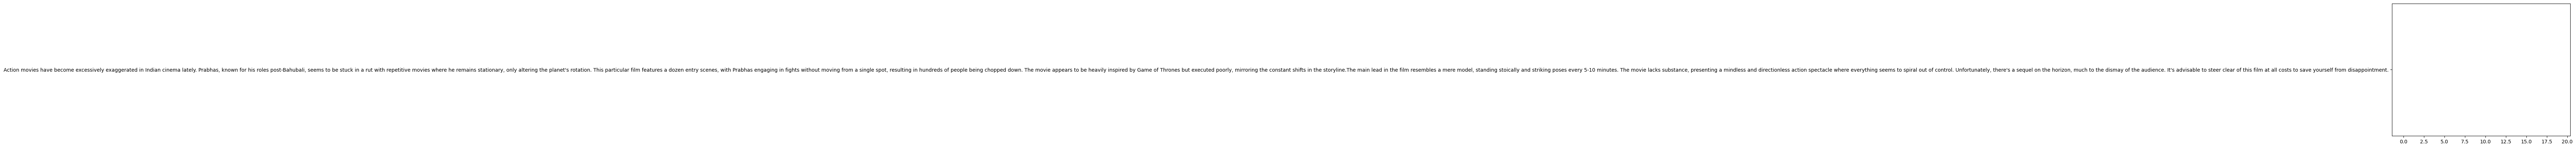

In [29]:
plt.bar(np.arange(20), df.reviews.tolist()[1])

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [1]:
# Write your code here
# Write your code here
!pip install bertopic


In [19]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df.reviews.tolist())
freq = topic_model.get_topic_info();
freq.head(5)

2024-03-28 02:38:50,943 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-28 02:39:01,653 - BERTopic - Embedding - Completed ✓
2024-03-28 02:39:01,660 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-28 02:39:12,778 - BERTopic - Dimensionality - Completed ✓
2024-03-28 02:39:12,781 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-28 02:39:12,796 - BERTopic - Cluster - Completed ✓
2024-03-28 02:39:12,802 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-28 02:39:12,846 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,19,-1_the_and_of_to,"[the, and, of, to, in, is, it, but, movie, for]","[Salaar Part 1 has an unbearable first half, w..."


In [20]:
topic_model.get_topic(-1)

[('the', 0.17722428635945073),
 ('and', 0.10374031202701829),
 ('of', 0.09935020837636124),
 ('to', 0.09372551196338676),
 ('in', 0.08013752096467096),
 ('is', 0.07952384832106965),
 ('it', 0.05654399499984644),
 ('but', 0.05441277505360372),
 ('movie', 0.05369552358077006),
 ('for', 0.05152237793296227)]

In [21]:
topic_model.visualize_term_rank()

In [22]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [24]:
# Write your code here
#Matrix decomposition is utilized in LSA to grab the topics or subjects, and dimension reduction helps to explain them according to how they load onto words. While most of the time, negative values of its loadings might occasionally make interpretation more difficult. LSA maintains the two primary inputs of the corpus and the dictionary. LDA, on the other hand, links terms within the text and terms from other possible sources. Its ability to handle complex language is one of the top qualities. It is interesting to note that the product reviews at the top and bottom of the list are fairly similar. The power of LDA is that it is capable of discovering real topics from the original matrix document while leaving alone other information. Hence, LDA will usually outperform coupled efforts of BERT and LDA, outperforming one another.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:My journey of working with text data and exploring different topic modeling algorithms, including LDA, NMF, LSA, and HDP, has been very enlightening.
I familiarized myself with the theoretical framework behind each of those algorithms and learned how to apply them to distill meaningful clusters of topics from large text datasets.
The different background of these algorithms, including LDA’s probabilistic basis, NMF and its non-negative matrix factorization, LSA and its use of dimensionality reduction, and HDP’s flexibility, provided me with a comprehensive understanding of how these work.
Furthermore, getting the ability to implement these models on data has allowed me to see the subtleties of how feature extraction works in practice and how different approaches often reveal different aspects of the data.
This allowed me to better use my natural language processing skills and also to see how important preprocessing is and how much the choice of an algorithm affects the interpretability and coherence of topics.
In summary, I feel that this combination of theory and practice significantly improved my toolkit for working with unstructured text data.

First, it is not easy to understand which settings are best to use in the model, especially with the LDA method.
These settings are called hyperparamters and they help in deciding how the model sees topics in the documents.
Getting the right settings can be hard and can take a lot of time and computer power because changing these settings can really change what topics the model will find.
The difficulty with topics is to understand if the ones your model finds are good ones or not. Indeed, there is no easy way to measure it; it often takes someone who knows a lot about the subject to look at the topics and say if they make sense or not.
This add also another difficulty: it can be hard to compare models and methods with one another, since what looks like a good topic to one person might not to another.

It’s been great to learn about topic modeling- such as LDA and NMF- as part of my journey into data science.
I’ve learned how to identify important themes in huge amounts of text: a critical skill when trying to understand large data sets.
But it’s not just learning about text; I’ve added another fantastic set of tools to my data science skills, making me even better at understanding what sets of data mean.
I have also been able to improve my problem-solving abilities both by learning how to assess whether I’ve made the correct selections and by assessing my results in terms of what makes them effective or inefficient.





'''